In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [87]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [88]:
x=df.iloc[:,[2,3]].values
y=df.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
#Define base models
base_model=[]
base_model.append(('dt',DecisionTreeClassifier(max_depth=3)))
base_model.append(('knn',KNeighborsClassifier(n_neighbors=5)))
base_model.append(('lr',LogisticRegression()))
#Define meta model
meta_model=LogisticRegression()
#Build stacking Classifier
model=StackingClassifier(estimators=base_model,final_estimator=meta_model,cv=5)
model.fit(x_train,y_train)


,"estimators estimators: list of (str, estimator)Base estimators which will be stacked together. Each element of thelist is defined as a tuple of string (i.e. name) and an estimatorinstance. An estimator can be set to 'drop' using `set_params`.The type of estimator is generally expected to be a classifier.However, one can pass a regressor for some use case (e.g. ordinalregression).","[('dt', ...), ('knn', ...), ...]"
,"final_estimator final_estimator: estimator, default=NoneA classifier which will be used to combine the base estimators.The default classifier is a:class:`~sklearn.linear_model.LogisticRegression`.",LogisticRegression()
,"cv cv: int, cross-validation generator, iterable, or ""prefit"", default=NoneDetermines the cross-validation splitting strategy used in`cross_val_predict` to train `final_estimator`. Possible inputs forcv are:* None, to use the default 5-fold cross validation,* integer, to specify the number of folds in a (Stratified) KFold,* An object to be used as a cross-validation generator,* An iterable yielding train, test splits,* `""prefit""`, to assume the `estimators` are prefit. In this case, the estimators will not be refitted.For integer/None inputs, if the estimator is a classifier and y iseither binary or multiclass,:class:`~sklearn.model_selection.StratifiedKFold` is used.In all other cases, :class:`~sklearn.model_selection.KFold` is used.These splitters are instantiated with `shuffle=False` so the splitswill be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here.If ""prefit"" is passed, it is assumed that all `estimators` havebeen fitted already. The `final_estimator_` is trained on the `estimators`predictions on the full training set and are **not** cross validatedpredictions. Please note that if the models have been trained on the samedata to train the stacking model, there is a very high risk of overfitting... versionadded:: 1.1 The 'prefit' option was added in 1.1.. note:: A larger number of split will provide no benefits if the number of training samples is large enough. Indeed, the training time will increase. ``cv`` is not used for model evaluation but for prediction.",5
,"stack_method stack_method: {'auto', 'predict_proba', 'decision_function', 'predict'}, default='auto'Methods called for each base estimator. It can be:* if 'auto', it will try to invoke, for each estimator, `'predict_proba'`, `'decision_function'` or `'predict'` in that order.* otherwise, one of `'predict_proba'`, `'decision_function'` or `'predict'`. If the method is not implemented by the estimator, it will raise an error.",'auto'
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for `fit` of all `estimators`.`None` means 1 unless in a `joblib.parallel_backend` context. -1 meansusing all processors. See :term:`Glossary ` for more details.",None
,"passthrough passthrough: bool, default=FalseWhen False, only the predictions of estimators will be used astraining data for `final_estimator`. When True, the`final_estimator` is trained on the predictions as well as theoriginal training data.",False
,"verbose verbose: int, default=0Verbosity level.",0
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samp

Accuracy: 0.9


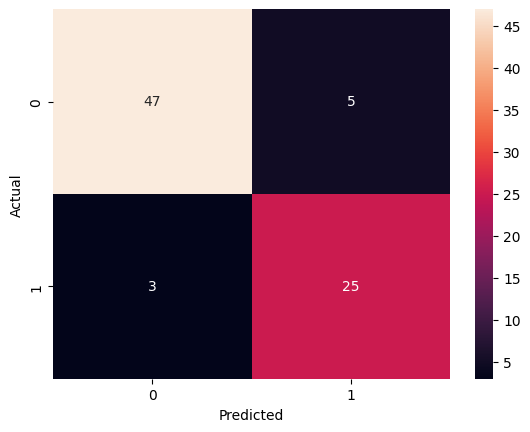

In [89]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print("Accuracy:",accuracy)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Loan Prediction Dataset

In [90]:
df=pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [91]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [92]:
df=df[['ApplicantIncome', 'LoanAmount', 'Credit_History','Self_Employed', 'Loan_Status']]
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [93]:
df.isna().sum()

ApplicantIncome    0
LoanAmount         0
Credit_History     0
Self_Employed      0
Loan_Status        0
dtype: int64

In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = ['Self_Employed', 'Loan_Status']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [95]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)  

In [96]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
svm= SVC()
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

In [98]:
print("\nModel Performance Comparison")
print("----------------------------")
print(f"Logistic Regression Accuracy : {acc_lr:.2f}")
print(f"Decision Tree Accuracy      : {acc_dt:.2f}")
print(f"Random Forest Accuracy      : {acc_rf:.2f}")
print(f"K-Nearest Neighbors Accuracy: {acc_knn:.2f}")
print(f"Support Vector Machine Accuracy: {acc_svm:.2f}")


Model Performance Comparison
----------------------------
Logistic Regression Accuracy : 0.77
Decision Tree Accuracy      : 0.66
Random Forest Accuracy      : 0.78
K-Nearest Neighbors Accuracy: 0.75
Support Vector Machine Accuracy: 0.78


Stacking Classifier Accuracy : 0.77


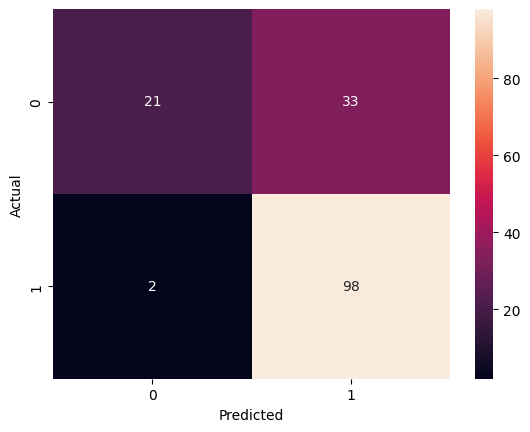

In [99]:
base_models = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]
meta_model = LogisticRegression()
model = StackingClassifier(estimators=base_models, final_estimator=meta_model,cv=5)
model.fit(x_train, y_train)
y_pred_stack = model.predict(x_test)
acc_stack = accuracy_score(y_test, y_pred_stack)
print(f"Stacking Classifier Accuracy : {acc_stack:.2f}")
cm=confusion_matrix(y_test, y_pred_stack)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()